# Predicting Stock Prices with Recurrent Neural Networks in TensorFlow

Written by: Udbhav Prasad <br>
Linkedin: https://www.linkedin.com/in/udbhav-prasad-1506b7192/ <br>
HackerRank: https://www.hackerrank.com/uprasad1 <br>
Github: https://github.com/UdbhavPrasad072300 <br>
Computer Science Co-op - Ryerson University <br> <hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [2]:
import yfinance as yf

## Data Preprocessing

In [3]:
nvda = yf.Ticker("NVDA")

In [4]:
nvda.info

{'zip': '95051',
 'sector': 'Technology',
 'fullTimeEmployees': 13775,
 'longBusinessSummary': "NVIDIA Corporation operates as a visual computing company worldwide. It operates in two segments, GPU and Tegra Processor. The GPU segment offers processors, which include GeForce for PC gaming and mainstream PCs; GeForce NOW for cloud-based gaming; Quadro for design professionals working in computer-aided design, video editing, special effects, and other creative applications; Tesla for artificial intelligence (AI) utilizing deep learning, accelerated computing, and general purpose computing; GRID, which provides power of NVIDIA graphics through the cloud and datacenters; DGX for AI scientists, researchers, and developers; and EGX for accelerated AI computing at the edge. The Tegra Processor segment provides processors comprising SHIELD devices and services designed to harness the power of mobile-cloud to revolutionize home entertainment, AI, and gaming; AGX, a power-efficient AI computing 

In [5]:
hist = nvda.history(period="5Y")

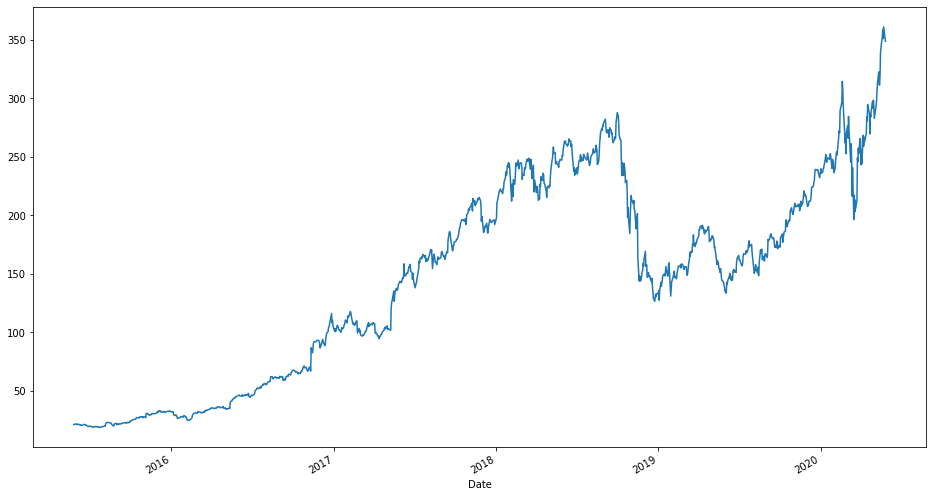

In [6]:
hist['Close'].plot(figsize=(16, 9))

In [7]:
hist.to_csv('NVDA.csv')

Importing Training Set

In [8]:
dataset_train = hist
training_set = dataset_train.iloc[:, 1:2].values

In [9]:
len(training_set)

1259

Feature Scaling (Normalizing)

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Creating a data structure with 60 timesteps and 1 output

In [11]:
X_train = []
y_train = []
for i in range(60, len(training_set)-200):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building Recurrent Neural Network

Initializing Sequential Network

In [13]:
regressor = Sequential()

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(Dense(units = 1))

Compiling Recurrent Neural Network

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Training Recurrent Neural Network

In [20]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 999 samples
Epoch 1/100
999/999 [==============================] - 5s 5ms/sample - loss: 0.0283
Epoch 2/100
999/999 [==============================] - 0s 340us/sample - loss: 0.0052
Epoch 3/100
999/999 [==============================] - 0s 341us/sample - loss: 0.0036
Epoch 4/100
999/999 [==============================] - 0s 340us/sample - loss: 0.0035
Epoch 5/100
999/999 [==============================] - 0s 344us/sample - loss: 0.0035
Epoch 6/100
999/999 [==============================] - 0s 339us/sample - loss: 0.0028
Epoch 7/100
999/999 [==============================] - 0s 338us/sample - loss: 0.0033
Epoch 8/100
999/999 [==============================] - 0s 340us/sample - loss: 0.0033
Epoch 9/100
999/999 [==============================] - 0s 346us/sample - loss: 0.0032
Epoch 10/100
999/999 [==============================] - 0s 344us/sample - loss: 0.0028
Epoch 11/100
999/999 [==============================] - 0s 348us/sample - loss: 0.0027
Epoch 12/100
999/999 [===========

999/999 [==============================] - 0s 369us/sample - loss: 9.1329e-04
Epoch 95/100
999/999 [==============================] - 0s 365us/sample - loss: 9.8267e-04
Epoch 96/100
999/999 [==============================] - 0s 370us/sample - loss: 0.0011
Epoch 97/100
999/999 [==============================] - 0s 372us/sample - loss: 9.7514e-04
Epoch 98/100
999/999 [==============================] - 0s 381us/sample - loss: 0.0010
Epoch 99/100
999/999 [==============================] - 0s 377us/sample - loss: 0.0010
Epoch 100/100
999/999 [==============================] - 0s 375us/sample - loss: 9.7904e-04


## Predictions and Visualizations

In [21]:
# Getting the stock price of 2020
dataset_test = pd.read_csv("NVDA.csv")
dataset_test = dataset_test.iloc[-200:]
len(dataset_test)

200

In [22]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [23]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Plotting

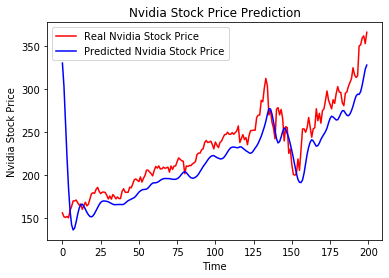

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'Real Nvidia Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Nvidia Stock Price')
plt.title('Nvidia Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nvidia Stock Price')
plt.legend()
plt.show()